Notebook to plot global mean precipitation rate time series and Hovmoeller diagrams (time vs longitude) of precipitation rate averaged over a latitudinal band

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Hovmoeller_plot import hovmoller_plot
from aqua import Reader, catalogue
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y

FESOM	tco3999-ng5	2.5km experiment,

Read data from LRA and plot global mean precipitation rate

In [1]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon" #Low Resolution Archive

#add era 5 and MSWEP
data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve()["tprate"]

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        reader.fldmean(data[(model, exp)]).plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("m s-1")
plt.title("global mean precipitation rate")

NameError: name 'Reader' is not defined

Now produce Hovmoeller plot of tropical precipitation (time VS lat, to see the latitudinal position of the ITCZ)

tprate [m s**-1]
tprate [m s**-1]
tprate [m s**-1]


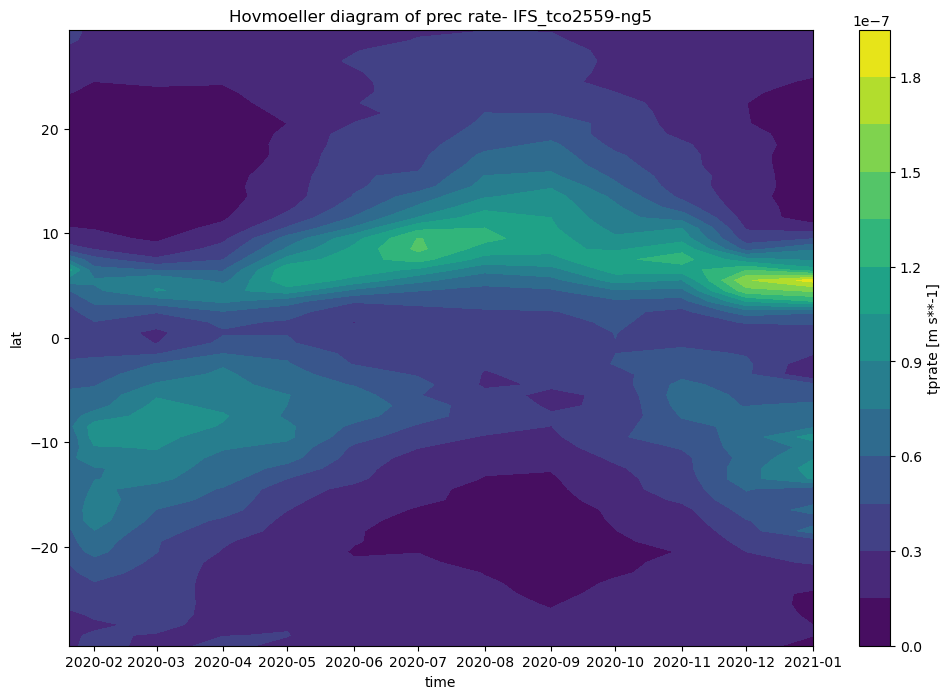

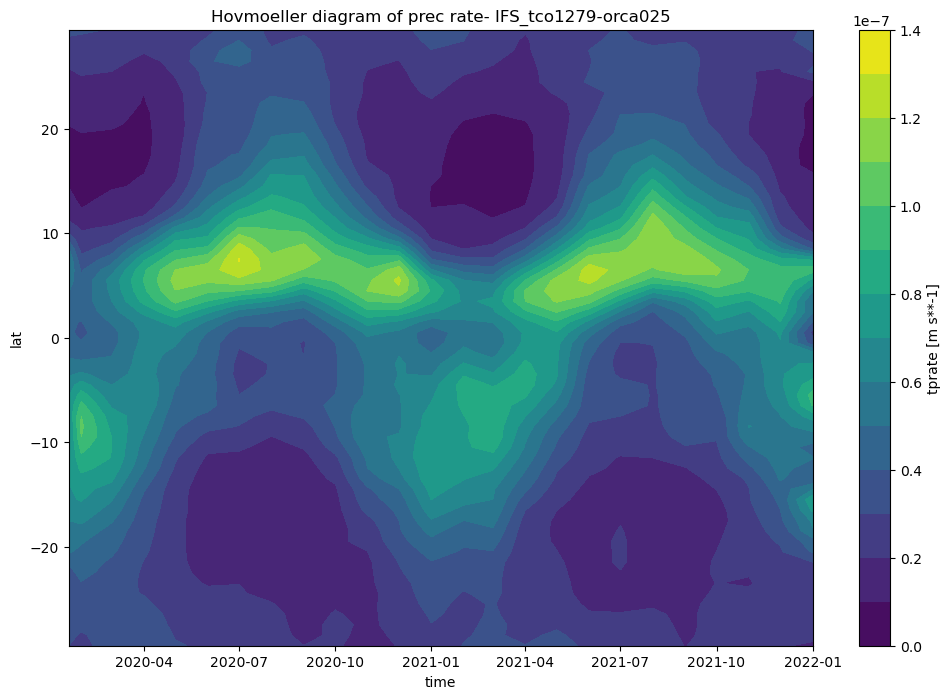

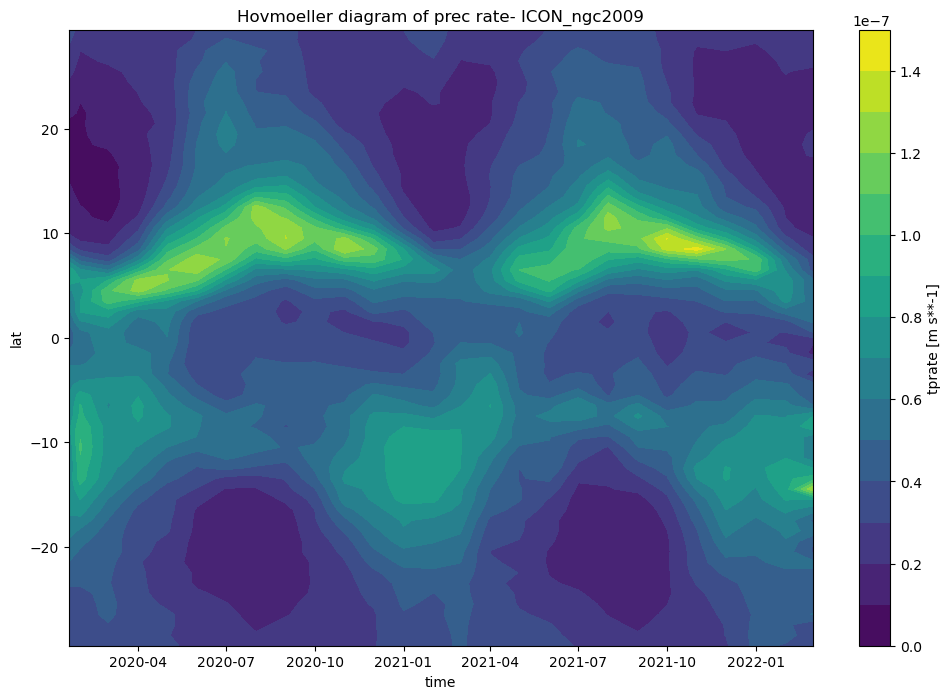

In [8]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

# boundary lats for averaging, not working correctly (i.e. real lat considered is 90-lat_N)
lat_S=-60
lat_N = +60
data = {}

for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source, regrid="r100")
        data[(model, exp)] = reader.retrieve()["tprate"].isel(lat=slice(lat_N,lat_S))
        hovmoller_plot(data[(model, exp)],dim='lon',invert_axis=False,contour=True,title=f"Hovmoeller diagram of prec rate- {model}_{exp}",levels=13)

In [5]:
#choose latitudinal band
lat_S=  -30
lat_N = +30

reader = Reader(model="MSWEP", exp="past", source="monthly")#, regrid="r100")
data = reader.retrieve()['tprate'].isel(lat=slice(lat_N,lat_S))

# perform annual mean
climatology = data.groupby("time.month").mean("time")
climatology
hovmoller_plot(climatology,dim='lon',invert_axis=False,climatology=True,contour=True,title=f"Hovmoeller diagram of prec rate - MSWEP",levels=13)

TypeError: 'float' object cannot be interpreted as an integer